# Assignment 2: Linear Models and Validation Metrics (40 marks total)
### Due: February 14 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (20 marks)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Step 1: Data Input (1 mark)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [3]:
# TO DO: Import spam dataset from yellowbrick library (0.5 marks)
import yellowbrick
from yellowbrick.datasets import load_spam

# TO DO: Print the size of X and y (0.5 marks)
X, y = load_spam()

print(f"X: type={type(X)}, shape={X.shape}")
print(f"y: type={type(y)}, shape={y.shape}")

X: type=<class 'pandas.core.frame.DataFrame'>, shape=(4600, 57)
y: type=<class 'pandas.core.series.Series'>, shape=(4600,)


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [6]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum().sum()}")

Missing values in X: 0
Missing values in y: 0


For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **5%** of the data. Use `random_state=0`.

In [9]:
from sklearn.model_selection import train_test_split
#  TO DO: Create X_small and y_small (1 mark)

X_small, _, y_small, _ = train_test_split(X, y, test_size=0.95, random_state=0)

print(f"X_small: type={type(X_small)}, shape={X_small.shape}")
print(f"y_small: type={type(y_small)}, shape={y_small.shape}")

X_small: type=<class 'pandas.core.frame.DataFrame'>, shape=(230, 57)
y_small: type=<class 'pandas.core.series.Series'>, shape=(230,)


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model 

Calculate the training, validation and testing accuracies for the three different tests implemented in Step 3. For this case, you can use `cross_validate()` with `cv=5` and `scoring='accuracy'` to get the training and validation accuracies for each of the three datasets. For the testing set, you can use 10% of the data, split with `random_state=0`.

### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy and testing accuracy
2. Add the data size, training accuracy and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [20]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
#Step 3
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)

model.fit(X,y)
print(f"Model score on full dataset: {model.score(X, y)}")

model.fit(X.iloc[:, :2], y)
print(f"Model score on first two columns: {model.score(X.iloc[:, :2], y)}")

model.fit(X_small, y_small)
print(f"Model score on small dataset: {model.score(X_small, y_small)}")

#Step 4
from sklearn.model_selection import cross_validate

datasets = []

# Full dataset
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.10, random_state=0)
cv_results = cross_validate(model, X_train_full, y_train_full, cv=5, scoring='accuracy', return_train_score=True)
model.fit(X_train_full, y_train_full)
score = model.score(X_test_full, y_test_full)
datasets.append(('Full dataset', cv_results['train_score'], cv_results['test_score'], score))

# First two columns
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :2], y, test_size=0.10, random_state=0)
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
datasets.append(('First two columns', cv_results['train_score'], cv_results['test_score'], score))

# Small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=0) # Resplit the data
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
datasets.append(('Small dataset', cv_results['train_score'], cv_results['test_score'], score))

results = pd.DataFrame(columns=['Data size', 'Training accuracy', 'Validation accuracy', 'Testing accuracy'])

# Loop through datasets and store results
for name, train_acc, val_acc, test_acc in datasets:
    results = pd.concat([results, pd.DataFrame({
        'Data size': [name],
        'Training accuracy': [train_acc],
        'Validation accuracy': [val_acc],
        'Testing accuracy': [test_acc]
    })], ignore_index=True)

# Print the results DataFrame
print(results)

Model score on full dataset: 0.9319565217391305
Model score on first two columns: 0.616304347826087
Model score on small dataset: 0.9434782608695652
           Data size                                  Training accuracy  \
0       Full dataset  [0.927536231884058, 0.9266304347826086, 0.9320...   
1  First two columns  [0.6105072463768116, 0.615036231884058, 0.6147...   
2      Small dataset  [0.9510869565217391, 0.9510869565217391, 0.961...   

                                 Validation accuracy  Testing accuracy  
0  [0.928743961352657, 0.9263285024154589, 0.9239...          0.941304  
1  [0.6195652173913043, 0.6147342995169082, 0.612...          0.591304  
2  [0.8695652173913043, 0.9130434782608695, 0.804...          0.905721  


### Step 5.2: Visualize Classification Errors (2 marks)

In this section, print the confusion matrix to investigate the number of false positives vs. false negatives for the testing data. Use the full dataset for this analysis.

In [23]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset (1 mark)
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(model, X_train_full, y_train_full, cv=5)
y_target = y_train_full

<Axes: >

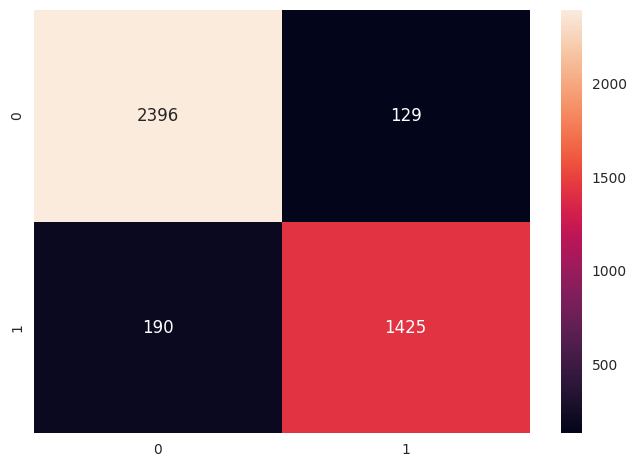

In [30]:
# TO DO: Print confusion matrix using a heatmap (1 mark)
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_target, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

### Questions (8 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. Why do the training and validation accuracy behave this way when the amount of data is changed? Relate your answer to concepts discussed in class.
1. Was any randomness included in this analysis? If yes, what step(s) introduced the randomness? What impact could this have on the results?
1. In this case, what do a false positive and a false negative represent? Which one is worse?

 - 1. Using full dataset allows the model to access the most information, having higher training and validation accuracies, the training and validation accuracy in the full dataset is on average around 93%. While using only the first two columns to provide the model it reduces the information available giving us lower accuracies around an average for both training and validation accuracy of 61.5%. Using the small dataset and all columns provides less information but provides all columns it still gives a fairly high training accuracy of around 95% but gives us a lower validation accuracy of around 85% due to the limited amount of data which can lead to overfitting.
 - 2. The accuracies behaviour can be explained wiht overfitting, undefitting, and bias-variance trade off. Firstly using the full data set has a good balance between bias and variance due to use of full dataset proving a higher accuracy. In the use of only the first 2 columns the model may be underfitting as it lacks a significant amount of the dataset to make accurate predictions due to the simplicity of using only 2 columns, which this model provides a high bias and a low variance. With the smaller dataset, since it has a higher training score and a lower validation score, it demonstrates a high-variance model, since it has access to all of the features but lacks the amount of data the model tends to overfit the data leading to poor generalization of unseen data.
 - 3. Yes randomness was included in the analysis, it was used in step 3 and 4, the train_test_split function is used for randomness and random_state parameter was used to control the randomness of the split to allow the split to be reproducible. The impact leads variability in training, validation, and testing accuracies, with different splits in the data resulint in different models being trained. Randomness also helps accessing the model's ability to guess data, by using different splits and folds.
 - 4. Since we are looking at spam, a false would represent that the model predicted that it was spam while it is not spam, and a false negative represents actual spam but it was predicted not to be spam. In this context a false negative could be worse as some spam emails can be security risks such as phishing attacks and can have a risk to the user, and receiving spam emails can lead to distrust in an email filtering system.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

For sourcing my code I relied on class examples and slides, as well as technical documentation from sklearn to help me produce my code. I completed every step in order, as a lot of dependencies arised from each step. I used generative AI for helping in the use of functions from imported libraries to help me understand parameters and how it should be placed in order. The prompts I used was: "How to extract scores from the cross_validate function". Which helped with the display of the results. As well as helping concatenate to the results Dataframe with the prompt: "Iterate through datasets and add to results". Which then added my datasets to results. I had some challenges understanding concepts such as the discrepancies in the training and validation accuracy and after looking at the notes it helped me with a deeper understanding of what is occuring.

## Part 2: Regression (18 marks)

For this section, we will be using the auto-mpg dataset from Lab 2. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded from UCI website: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG 

Load the auto-mpg dataset and inspect the first few rows

In [ ]:
# TO DO: Import auto-mpg data and inspect the first few rows (0.5 marks)


### Step 2: Data Processing (2.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [ ]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)


Remove any columns that do not have numerical data.

In [ ]:
# TO DO: Remove non-numeric data (0.5 marks)


Split the auto-mpg data into the feature matrix and target vector. Inspect the first few columns of the feature matrix to make sure it split properly.

In [ ]:
# TO DO: Create feature matrix and target vector (1 mark) 


### Step 3: Implement and Validate Machine Learning Model (2.5 marks)

1. Import any required libraries
1. Split the data into training and testing sets (testing data should be 10% of the dataset)
1. Instantiate model `LinearRegression()`
1. Train and validate the machine learning model using the training set (using `cross_validate()` with `cv=5` and `scoring='r2'`)
1. Print the training and validation accuracy 

In [ ]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0


### Step 4: Test Model (1 mark)

Calculate the testing accuracy using the R^2 score

In [ ]:
# TO DO: ADD YOUR CODE HERE


### Step 5: Visualize Results (1.5 marks)

1. Plot the relationship between each of the features and the target vector using `pairplot`
1. Plot the correlation matrix
1. Print the coefficients for each feature and the intercept

In [ ]:
# TO DO: Plot pairplot (0.5 marks)


In [ ]:
# TO DO: Plot correlation matrix (0.5 marks)


In [ ]:
# TO DO: Print model coefficients and intercept (0.5 marks)


### Questions (6 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?
1. Do the coefficients for each of the features make sense when compared to the `pairplot` and the correlation matrix? Why or why not?
1. If you repeat this analysis with ridge regression, do the results change significantly? What do you think is the cause of these (changed or unchanged) results?

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*